In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
# Load the dataset from the provided URL

url = 'https://github.com/akhandelwal8/globaleconomics/blob/main/hwk/hwk4a_tradedataBWA.csv?raw=true'
df = pd.read_csv(url, sep='\t')

## 1a

In [3]:
total = df[['description', 'year', 'x']]
total = total.pivot(index='description', columns='year', values='x')
total['growth'] = (total[2023] - total[2000]) / total[2000] * 100

total

year,2000,2023,growth
description,,,
"Aircraft, spacecraft and parts thereof",4566759,4956454,8.533295
Albuminoidal substances; modified starches; glues; enzymes,28255,113896,303.100336
Aluminium and articles thereof,71525,4539418,6246.617267
Animal or vegetable fats and oils and their cleavage products; prepared animal fats; animal or vegetable waxes,2114015,1055469,-50.072776
Animal originated products; not elsewhere specified or included,2707,15564,474.953823
...,...,...,...
"Wadding, felt and nonwovens, special yarns; twine, cordage, ropes and cables and articles thereof",35543,163635,360.386011
Wood and articles of wood; wood charcoal,423143,1127203,166.388195
"Wool, fine or coarse animal hair; horsehair yarn and woven fabric",36380,3618,-90.054975


## 1b

In [4]:
df_00 = df[df['year'] == 2000].copy().reset_index(drop=True)
df_00['x_tot'] = df_00['x'].sum()
df_00['x_wd_tot'] = df_00['x_wd'].sum()
df_00['sh_hs2'] = df_00['x'] / df_00['x_wd']
df_00['sh_wd'] = df_00['x_tot'] / df_00['x_wd_tot']
df_00['rca'] = df_00['sh_hs2'] / df_00['sh_wd']

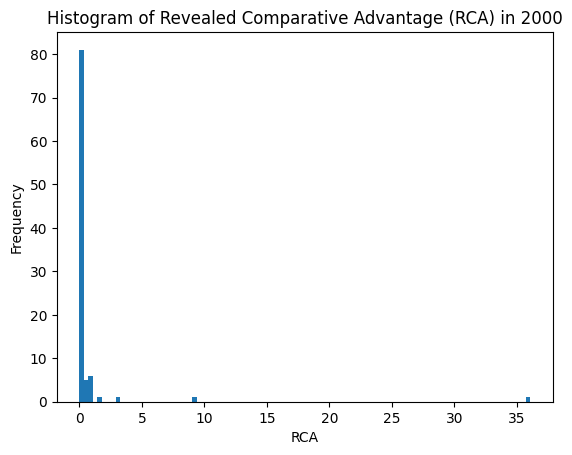

In [5]:
plt.hist(df_00['rca'], bins=100)
plt.xlabel('RCA')
plt.ylabel('Frequency')
plt.title('Histogram of Revealed Comparative Advantage (RCA) in 2000')
plt.show()

In [24]:
print(f"In 2000, Botswana had an RCA greater than 1 in {len(df_00[df_00['rca'] >= 1])} sectors.")

In 2000, Botswana had an RCA greater than 1 in 7 sectors.


## 1c

In [7]:
df_23 = df[df['year'] == 2023].copy().reset_index(drop=True)
df_23['x_tot'] = df_23['x'].sum()
df_23['x_wd_tot'] = df_23['x_wd'].sum()
df_23['sh_hs2'] = df_23['x'] / df_23['x_wd']
df_23['sh_wd'] = df_23['x_tot'] / df_23['x_wd_tot']
df_23['rca'] = df_23['sh_hs2'] / df_23['sh_wd']

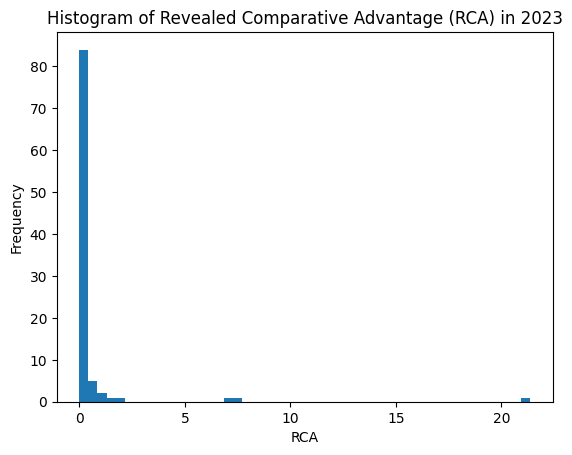

In [8]:
plt.hist(df_23['rca'], bins=50)
plt.xlabel('RCA')
plt.ylabel('Frequency')
plt.title('Histogram of Revealed Comparative Advantage (RCA) in 2023')
plt.show()

In [9]:
len(df_23[df_23['rca'] >= 1])

6

## 1d

In [10]:
df_00[df_00['hs2'] == 71]

,iso,hs2,description,year,x,x_wd,x_tot,x_wd_tot,sh_hs2,sh_wd,rca
70,BWA,71,"Natural, cultured pearls; precious, semi-preci...",2000,2305254826,158544560128,2771865783,6876776872512,0.01454,0.000403,36.07284


In [11]:
df_23[df_23['hs2'] == 71]

,iso,hs2,description,year,x,x_wd,x_tot,x_wd_tot,sh_hs2,sh_wd,rca
70,BWA,71,"Natural, cultured pearls; precious, semi-preci...",2023,4357365455,974754676736,5500564093,26297198597376,0.00447,0.000209,21.371299


Botswana decreased its comparative advantage in HS71 (with the RCA decreasing from 36.073 to 21.371).

## 1e

In [12]:
df_00['rca_23'] = df_23['rca']

In [13]:
df_00['rca_change'] = df_00['rca_23'] - df_00['rca']

In [14]:
df_00.sort_values(by='rca_change', ascending=False).head(3)

,iso,hs2,description,year,x,x_wd,x_tot,x_wd_tot,sh_hs2,sh_wd,rca,rca_23,rca_change
0,BWA,1,Animals; live,2000,235090,9799775232,2771865783,6876776872512,0.000024,0.000403,0.059516,7.301145,7.241630
25,BWA,26,"Ores, slag and ash",2000,137671,26425796608,2771865783,6876776872512,0.000005,0.000403,0.012925,7.197501,7.184576
76,BWA,78,Lead and articles thereof,2000,9434,1736383232,2771865783,6876776872512,0.000005,0.000403,0.013479,1.659831,1.646352


The top 3 industry sectors in which Botswana's comparative advantage increased, based on absolute increases in the RCA, are (1) Live Animals, HS1, (2) Ores, Slag, and Ash, HS26, and (3) Lead and Articles Thereof, HS78.

## 1f

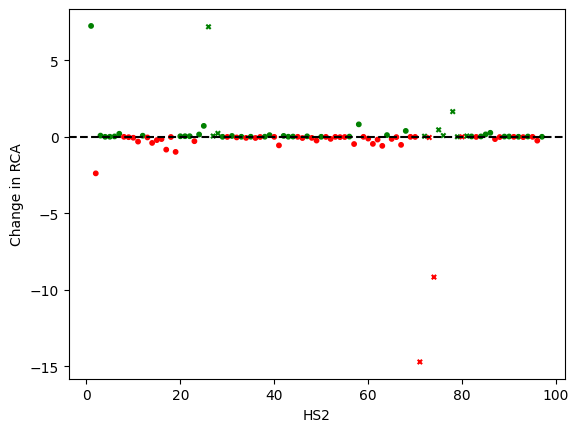

In [28]:
minerals = [26,27,28,71,72,73,74,75,76,77,78,79,80,81]

mineralData = df_00[df_00['hs2'].isin(minerals)]
nonMineralData = df_00[np.invert(df_00['hs2'].isin(minerals))]

colors1 = ['r' if RCAdelta < 0 else 'g' for RCAdelta in mineralData['rca_change']]
colors2 = ['r' if RCAdelta < 0 else 'g' for RCAdelta in nonMineralData['rca_change']]

plt.figure()
plt.scatter(mineralData['hs2'],mineralData['rca_change'],10,marker='x',c=colors1)
plt.scatter(nonMineralData['hs2'],nonMineralData['rca_change'],10,marker='o',c=colors2)
plt.axhline(0,color='k',linestyle='--')
plt.xlabel("HS2")
plt.ylabel("Change in RCA")
plt.show()

# 2)

In [103]:
# Load the dataset from the provided URL

url = 'https://github.com/akhandelwal8/globaleconomics/blob/main/hwk/hwk4b_tradedataZAF.csv?raw=true'
df1 = pd.read_csv(url, sep='\t')

## 2a)

In [104]:
world = df1.groupby('hs2')['xusa'].sum().reset_index(drop=True)
world_tot = df1['xusa'].sum()

In [105]:
df1 = df1[df1['iso'] == 'ZAF'].copy().reset_index(drop=True)

In [106]:
df1['x_wd'] = world
df1['x_wd_tot'] = world_tot

In [107]:
df1['x_tot'] = df1['xusa'].sum()

In [108]:
df1['sh_hs2'] = df1['xusa'] / df1['x_tot']
df1['sh_wd'] = df1['x_wd'] / df1['x_wd_tot']
df1['rca'] = df1['sh_hs2'] / df1['sh_wd']

## 2b)

In [110]:
df1.sort_values(by='rca', ascending=False).head(5)

,year,iso,hs2,description,xusa,dtariff_zaf,x_wd,x_wd_tot,x_tot,sh_hs2,sh_wd,rca
21,2023,ZAF,26,"ORES, SLAG AND ASH",3.032000e+08,0.002482,2.935200e+09,3.748076e+12,8.312755e+09,0.036474,0.000783,46.575214
61,2023,ZAF,71,"NATURAL OR CULTURED PEARLS, PRECIOUS OR SEMI-P...",2.954000e+09,0.000055,9.688400e+10,3.748076e+12,8.312755e+09,0.355358,0.025849,13.747439
65,2023,ZAF,75,NICKEL AND ARTICLES THEREOF,1.527000e+08,0.000000,5.398700e+09,3.748076e+12,8.312755e+09,0.018369,0.001440,12.753025
66,2023,ZAF,76,ALUMINIUM AND ARTICLES THEREOF,5.957000e+08,0.331613,3.411570e+10,3.748076e+12,8.312755e+09,0.071661,0.009102,7.872935
35,2023,ZAF,41,RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND ...,1.426613e+07,0.023800,8.599661e+08,3.748076e+12,8.312755e+09,0.001716,0.000229,7.479771


## 2c)

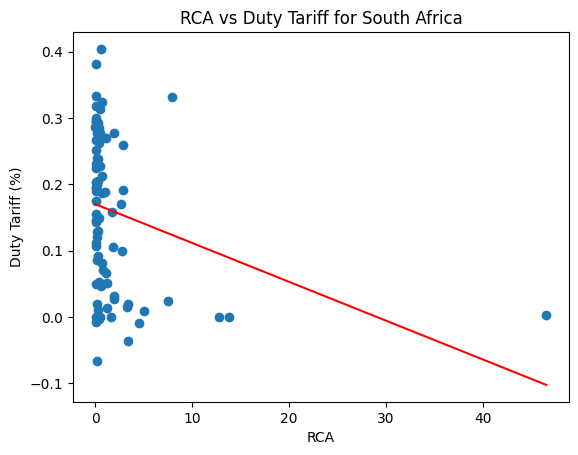

In [112]:
plt.scatter(df1['rca'], df1['dtariff_zaf'])
plt.plot(np.unique(df1['rca']),
         np.poly1d(np.polyfit(df1['rca'], df1['dtariff_zaf'], 1))(np.unique(df1['rca'])), color='red')
plt.xlabel('RCA')
plt.ylabel('Duty Tariff (%)')
plt.title('RCA vs Duty Tariff for South Africa')

plt.show()